In [ ]:
# Finding Maximum expected characters in a license plate

In [1]:
import pandas as pd

df=pd.read_csv(r"C:\Users\anilk\Downloads\numb_plate_rec\Licplatesrecognition_train.csv")
df

,img_id,text
0,0.jpg,117T3989
1,1.jpg,128T8086
2,10.jpg,94T3458
3,100.jpg,133T6719
4,101.jpg,68T5979
...,...,...
895,95.jpg,39T8707
896,96.jpg,92T589
897,97.jpg,180T706
898,98.jpg,87T7369


In [2]:
a=list(df['text'].unique())
a

['117T3989',
 '128T8086',
 '94T3458',
 '133T6719',
 '68T5979',
 '106T2131',
 '117T2600',
 '58T8888',
 '93T5599',
 '155T1216',
 '191T2827',
 '127T9733',
 '121T237',
 '96T8557',
 '172T9314',
 '152T8269',
 '127T9295',
 '188T956',
 '179T7121',
 '169T9685',
 '161T3230',
 '74T3819',
 '155T5259',
 '137T5115',
 '156T2325',
 '134T3970',
 '120T5039',
 '121T6559',
 '145T5368',
 '100T8109',
 '118T5018',
 '68T3759',
 '190T413',
 '125T5378',
 '182T2759',
 '165T6025',
 '119T9133',
 '66T5697',
 '109T2328',
 '84T1104',
 '165T895',
 '114T7304',
 '37T3819',
 '115T6064',
 '98T5178',
 '85T3827',
 '112T6988',
 '68T6341',
 '90T4636',
 '141T13',
 '181T7519',
 '106T9514',
 '156T3853',
 '159T7948',
 '155T9278',
 '191T9338',
 '164T9653',
 '148T2903',
 '90T9848',
 '87T9170',
 '176T755',
 '156T7524',
 '168T1951',
 '31T8115',
 '193T4091',
 '142T8217',
 '159T3782',
 '173T4951',
 '136T2146',
 '161T3015',
 '194T735',
 '123T3112',
 '112T8576',
 '70T652',
 '140T566',
 '89T3511',
 '40T1901',
 '195T2612',
 '83T1812',
 '18

In [3]:
b=set()
for i in a:
    for j in i:
        b.add(j)

In [4]:
b

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'N', 'T'}

In [5]:
# Filter rows where 'text' contains 'N'
contains_N = df[df['text'].str.contains('N')]

# Print img_id and text side by side
for _, row in contains_N.iterrows():
    print(f"{row['img_id']} --> {row['text']}")

204.jpg --> 103679N
219.jpg --> 137564N
450.jpg --> 103679N
51.jpg --> 103679N
896.jpg --> 103679N


In [6]:
cnt=0
cnt1=100

for i in a:
    cnt=max(cnt,len(i))
    cnt1=min(cnt1,len(i))

print(cnt1)
cnt

5


8

In [ ]:
# max=8 , min=5  (length of text on lisence plate ranges from 5 to 8)

In [7]:
import cv2
import os
import pandas as pd


# Loads license plate images and their corresponding text annotations

data_path = r"C:\Users\anilk\Downloads\numb_plate_rec\license_plates_recognition_train"
annotations = pd.read_csv(r"C:\Users\anilk\Downloads\numb_plate_rec\Licplatesrecognition_train.csv")  # adjust if filename differs

char_images = []
char_labels = []

for _, row in annotations.iterrows():
    img_path = os.path.join(data_path, row['img_id'])
    text = row['text']
    
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Preprocessing

    # Converts to grayscale and applies Otsu's thresholding to create a binary image
        # (Image thresholding is a technique in image processing used to convert a grayscale image into a binary image (black and white), 
        # based on a threshold value.)
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    
    # Character segmentation via contours (simplified example)

    # Detects the outlines (contours) of connected white regions in the binary image
    # Each contour represents a potential character in the license plate.
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sorts Characters Left-to-Right by X-Coordinate
    # License plate characters must be read in correct left-to-right order. Without sorting, you might get "B1A" instead of "1BA".
    boxes = sorted([cv2.boundingRect(c) for c in contours], key=lambda x: x[0])  
    
    # Checks if Detected Characters Match Annotation
    # Ensures only valid samples (where segmentation worked perfectly) are used for training.
    if len(boxes) != len(text):  
        continue

    # Extracts each character, resizes to 28x28 pixels, and stores with its label
    for i, box in enumerate(boxes):
        x, y, w, h = box
        char = thresh[y:y+h, x:x+w]
        char = cv2.resize(char, (28, 28))  # Resize to fixed size
        char_images.append(char)
        char_labels.append(text[i])



# This prepares individual character images for training a character classifier

In [8]:
char_set = ['0','1','2','3','4','5','6','7','8','9','N','T']
char_to_idx = {char: idx for idx, char in enumerate(char_set)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}


In [9]:
char_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'N': 10,
 'T': 11}

In [10]:
idx_to_char

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'N',
 11: 'T'}

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import os

# Constants
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 128
NUM_CLASSES = 13  # 0-9 + N + T + 'blank'

# Maximum expected characters in a license plate
MAX_LENGTH = 8  # The model will always predict 8 characters, padding with 'blank' if needed

BATCH_SIZE = 32
EPOCHS = 75

# Character set
characters = ['0','1','2','3','4','5','6','7','8','9','N','T','blank']
char_to_idx = {c: i for i, c in enumerate(characters)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

# Model definition
def create_model():
    input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 1)
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    # Processes entire feature map as a whole. - Used for final interpretation.
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)


    # Multi-Output Design: -   Multiple outputs (one per character position
    # 8 separate output heads (for MAX_LENGTH=8)
    # Each head predicts one character with softmax activation
    outputs = [Dense(NUM_CLASSES, activation='softmax', name=f'char_{i}')(x) for i in range(MAX_LENGTH)]

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load and preprocess data
def load_data(image_dir, label_csv):
    df = pd.read_csv(label_csv)
    X = []
    y = [[] for _ in range(MAX_LENGTH)]

    for _, row in df.iterrows():
        filename = row['img_id']
        text = row['text']

        img_path = os.path.join(image_dir, filename)
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
            
        # Image Processing:
        #     Reads as grayscale
        #     Resizes to 128x64
        #     Normalizes to [0,1] range
        img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1)
        X.append(img)

        # Pad text with 'blank' to MAX_LENGTH(8)
        text_chars = list(text)
        while len(text_chars) < MAX_LENGTH:
            text_chars.append('blank')
        text_chars = text_chars[:MAX_LENGTH]

        for i in range(MAX_LENGTH):
            ch = text_chars[i]
            if ch not in char_to_idx:
                ch = 'blank'
            label_vec = to_categorical(char_to_idx[ch], NUM_CLASSES)
            y[i].append(label_vec)

    X = np.array(X)
    y = [np.array(y[i]) for i in range(MAX_LENGTH)]
    return X, y

# Data generator with augmentation

def custom_data_generator(X, y, batch_size=BATCH_SIZE):
    # Augmentation Techniques used:
    #     Small rotations (±5°)
    #     Random shifts (±10%)
    #     Shearing and zooming
    #     Helps prevent overfitting
    datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode='nearest'
    )

    num_samples = len(X)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_idx = indices[start:end]

            X_batch = np.array([X[i] for i in batch_idx])
            y_batch = [np.array([y[j][i] for i in batch_idx]) for j in range(MAX_LENGTH)]

            X_batch_aug = np.empty_like(X_batch)
            for i, img in enumerate(X_batch):
                X_batch_aug[i] = datagen.random_transform(img)

            yield X_batch_aug, y_batch

# Decode prediction output
    # Converts model outputs (8 probability distributions) to final string
    # Ignores 'blank' characters
    # Example: Converts [[0.9 for 'A'], [0.8 for '1'], ...] → "A1..."

def decode_prediction(preds):
    decoded = ''
    for p in preds:
        idx = np.argmax(p)
        char = idx_to_char[idx]
        if char != 'blank':
            decoded += char
    return decoded

# Load dataset
image_dir = r"C:\Users\anilk\Downloads\numb_plate_rec\license_plates_recognition_train"
label_csv = r"C:\Users\anilk\Downloads\numb_plate_rec\Licplatesrecognition_train.csv"
X, y = load_data(image_dir, label_csv)

# Train/validation split

# Split X first - 80% train, 20% validation
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

# For each y[i], split accordingly
y_train = []
y_val = []
for yi in y:
    y_train_i, y_val_i = train_test_split(yi, test_size=0.2, random_state=42)
    y_train.append(y_train_i)
    y_val.append(y_val_i)


# Create model
model = create_model()

# Train model with validation data
model.fit(
    custom_data_generator(X_train, y_train, BATCH_SIZE),
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    verbose=2
)







Epoch 1/75


22/22 - 22s - loss: 26.6193 - char_0_loss: 3.2278 - char_1_loss: 3.4538 - char_2_loss: 3.3085 - char_3_loss: 3.2404 - char_4_loss: 3.3780 - char_5_loss: 3.3216 - char_6_loss: 3.3050 - char_7_loss: 3.3843 - char_0_accuracy: 0.1065 - char_1_accuracy: 0.0696 - char_2_accuracy: 0.0852 - char_3_accuracy: 0.0895 - char_4_accuracy: 0.0710 - char_5_accuracy: 0.0966 - char_6_accuracy: 0.0824 - char_7_accuracy: 0.0824 - val_loss: 22.0456 - val_char_0_loss: 2.5413 - val_char_1_loss: 2.8267 - val_char_2_loss: 2.9962 - val_char_3_loss: 2.7419 - val_char_4_loss: 2.7871 - val_char_5_loss: 2.7899 - val_char_6_loss: 2.8272 - val_char_7_loss: 2.5354 - val_char_0_accuracy: 0.0056 - val_char_1_accuracy: 0.0889 - val_char_2_accuracy: 0.0000e+00 - val_char_3_accuracy: 0.0278 - val_char_4_accuracy: 0.1278 - val_char_5_accuracy: 0.0556 - val_char_6_accuracy: 0.0833 - val_char_7_accuracy: 0.0667 - 22s/epoch - 1s/step
Epoch 2/75
22/22 - 15s - loss: 23.4086 - char_0_loss: 2.7840 - char_1_loss: 3

In [ ]:
# --------- NOTES ---------


# Conv2D (2D Convolutional Layer) is a fundamental building block of Convolutional Neural Networks (CNNs) used for processing 2D image data.

# Early Layers (32 filters)
# Detect low-level features:
# → Edges, gradients, blobs, and simple textures.
# *(Example: Horizontal/vertical lines in "1" or "T")*

# Middle Layers (64 filters)
# Combine edges into mid-level features:
# → Curves, corners, and character parts (e.g., loops in "8" or "B").

# Deep Layers (128 filters)
# Recognize high-level features:
# → Full characters ("A", "7"), spatial relationships, and complex shapes.



# MaxPooling2D is a downsampling operation that reduces the spatial dimensions (width & height) of feature maps 
# while preserving the most important features.

In [12]:
# Evaluate the model on the full training set (or validation set if available)
results = model.evaluate(X, y, batch_size=BATCH_SIZE, verbose=1)

# results contains:
# [total_loss,
#  char_0_loss, char_1_loss, ..., char_7_loss,
#  char_0_accuracy, char_1_accuracy, ..., char_7_accuracy]

print(f"Total loss: {results[0]:.4f}")

# Number of outputs = MAX_LENGTH = 8
for i in range(MAX_LENGTH):
    loss = results[1 + i]               # losses for each char output
    acc = results[1 + MAX_LENGTH + i]  # accuracies for each char output
    print(f"Char_{i} - Loss: {loss:.4f}, Accuracy: {acc:.4f}")


29/29 [==============================] - 3s 105ms/step - loss: 1.6478 - char_0_loss: 0.0845 - char_1_loss: 0.1686 - char_2_loss: 0.0753 - char_3_loss: 0.0928 - char_4_loss: 0.2962 - char_5_loss: 0.3421 - char_6_loss: 0.3895 - char_7_loss: 0.1987 - char_0_accuracy: 0.9844 - char_1_accuracy: 0.9611 - char_2_accuracy: 0.9889 - char_3_accuracy: 0.9733 - char_4_accuracy: 0.9222 - char_5_accuracy: 0.9100 - char_6_accuracy: 0.8967 - char_7_accuracy: 0.9511
Total loss: 1.6478
Char_0 - Loss: 0.0845, Accuracy: 0.9844
Char_1 - Loss: 0.1686, Accuracy: 0.9611
Char_2 - Loss: 0.0753, Accuracy: 0.9889
Char_3 - Loss: 0.0928, Accuracy: 0.9733
Char_4 - Loss: 0.2962, Accuracy: 0.9222
Char_5 - Loss: 0.3421, Accuracy: 0.9100
Char_6 - Loss: 0.3895, Accuracy: 0.8967
Char_7 - Loss: 0.1987, Accuracy: 0.9511


In [13]:
import matplotlib.pyplot as plt

def predict_from_path(image_path, df):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found or cannot be read.")
        return

    img_resized = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
    img_norm = img_resized.astype(np.float32) / 255.0
    img_norm = np.expand_dims(img_norm, axis=-1)
    img_norm = np.expand_dims(img_norm, axis=0)  # batch dimension

    # Predict
    preds = model.predict(img_norm)
    pred_text = decode_prediction(preds)

    # Extract filename
    filename = os.path.basename(image_path)

    # Find actual label from CSV if available
    actual_row = df[df['img_id'] == filename]
    if not actual_row.empty:
        actual_text = actual_row.iloc[0]['text']
    else:
        actual_text = "Unknown (Not found in CSV)"

    # Print results
    print(f"Image: {filename}")
    print(f"Actual: {actual_text}")
    print(f"Predicted: {pred_text}")

    # Display image with matplotlib
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {actual_text}\nPredicted: {pred_text}")
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 363ms/step
Image: 14.jpg
Actual: 85T3827
Predicted: 85T3827


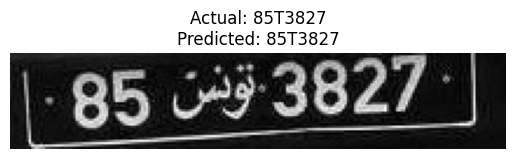

In [14]:
image_path = r"C:\Users\anilk\Downloads\numb_plate_rec\license_plates_recognition_train\14.jpg"
predict_from_path(image_path, df)


1/1 [==============================] - 0s 40ms/step
Image: 444.jpg
Actual: 114T4391
Predicted: 114T4391


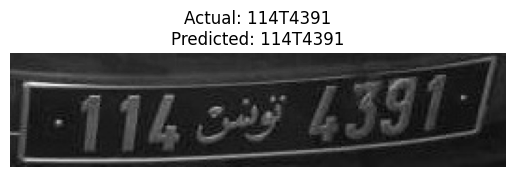

In [17]:
image_path = r"C:\Users\anilk\Downloads\numb_plate_rec\license_plates_recognition_train\444.jpg"
predict_from_path(image_path, df)


In [18]:
model.save("license_plate_model.h5") # save model for further use

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from tensorflow.keras.models import load_model

model = load_model("license_plate_model.h5")

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return np.expand_dims(img, axis=0)  # Add batch dimension

def decode_prediction(preds):
    decoded = ''
    for p in preds:
        idx = np.argmax(p[0])  # p[0] because shape is (1, num_classes)
        char = idx_to_char[idx]
        if char != 'blank':
            decoded += char
    return decoded


1/1 [==============================] - 0s 346ms/step


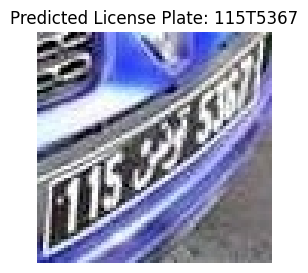

In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

IMAGE_HEIGHT = 64
IMAGE_WIDTH = 128
characters = ['0','1','2','3','4','5','6','7','8','9','N','T','blank']
char_to_idx = {c: i for i, c in enumerate(characters)}
idx_to_char = {i: c for c, i in char_to_idx.items()}


def preprocess_image(img_path):
   
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)  # Shape: (64, 128, 1)
    return np.expand_dims(img, axis=0)  # Shape: (1, 64, 128, 1)

def decode_prediction(preds):
    decoded = ''
    for p in preds:
        idx = np.argmax(p[0])  # p is shape (1, NUM_CLASSES)
        char = idx_to_char[idx]
        if char != 'blank':
            decoded += char
    return decoded

# Path to image
img_path = r"C:\Users\anilk\Downloads\numb_plate_rec\license_plates_recognition_train\69.jpg"

# Preprocess and predict
input_image = preprocess_image(img_path)
preds = model.predict(input_image)
predicted_text = decode_prediction(preds)

# Show the image with prediction
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plt

plt.figure(figsize=(6, 3))
plt.imshow(img_rgb)
plt.title(f"Predicted License Plate: {predicted_text}")
plt.axis('off')
plt.show()
